Практическая работа №1: Исследование алгоритмов формирования аддитивных цепочек
===

Вариант №40

Цель работы
---
Формирование представления о аддитивных цепочках, выработать умение составлять и применять алгоритмы для нахождения минимальных аддитивных цепочек для заданного числа, привить навык использования систем компьютерной алгебры для реализации алгоритмов.

Основные теоритические положения
---

### Бинарный метод
Для вычисления степени $n \in N$ по основанию $x$, она переводится в двоичный вид, отбрасывается старший разряд, и далее, передвигаясь по разрядам слева направо, порядок операций записывается по следующему правилу:
$$ y_{n} =
    \begin{cases}
        y_{n-1}^2*x   & \quad \text{If } 1\\
        y_{n-1}^2     & \quad \text{If } 0
    \end{cases}
$$
Количество операций можно рассчитать по формуле $\nu(n)+\lambda(n)-1$, где $\nu(n)$ - (вес Хэмминга) количество единиц в бинарной записи, а $\lambda(n)=\lfloor lb(n)\rfloor$.

### Метод множителей
Метод также применяется для вычисления $x^k$, $k \in N$. Если $k=j*i$, $j,i \in N$, то если степень $j$ можно получить за $n$ операций, а степень $i$ за $m$ операций, то $k$ можно получить за $n+m$ операций. Если $k$ - простое число, то рассматривается $k-1$, а затем домножается на $x$.

### Аддитивная цепочка
Аддитивная цепочка - последовательность для чисел $n \in N$ вида $1=a_0,a_1,..,a_{m-1},a_m=n$, где $a_i=a_j+a_k, k\leq j<i, \forall i: 0<i\leq m$, $i,j,k \in N$.
Наименьшая длинна аддитивной цепочки: $l(n)=m$

### Теорема Брауэра
При некотором $k<log_2log_2n$ справедливо следующее неравенство: $l(n)<(1+k^{-1})*\lceil log_2n\rceil +2^{k-1}-k+2$, из чего следует при $k=\lambda(\lambda(n))-2*\lambda(\lambda(\lambda(n)))$:
1. $\lim\limits_{x \to \infty} \frac{l(n)}{\lambda(n)}=1$
2. Наилучшая верхняя оценка $l(n)$: $\lambda(n)(1+\frac{1}{\lambda(\lambda(n))}+\frac{o(\lambda(\lambda(\lambda(n))))}{\lambda(\lambda(n))^2})$

### Шаги аддитивной цепочки
Шагом аддитивной цепочки называют пару $(j,k)$ с максимальным $j$, где $a_i=a_j+a_k, \forall i: 0<i\leq m, 0\leq k\leq j<i$.
Типы шагов:
#### Удвоение
$i$ шаг - удвоение, если $j=k=i-1$
$$a_i=2a_{i-1}$$
#### Звёздный шаг
$i$ шаг - звёздный, если $j=i-1, k \in [0,i-1]$
$$a_i=a_{i-1}+a_k$$
#### Малый шаг
$i$ шаг - малый, если $\lambda(a_i)=\lambda(a_{i-1})$.
Поскольку $a_{i-1}<a_i\leq 2a_{i-1}$, $\lambda(a_i)=\lambda(a_{i-1})+\delta, \delta \in \{0,1\}$, то $$l(n)=m=\lambda(n)+\rho$$ где $\rho$ - количество малых шагов.

Следствия:
1. $a_1=2*a_0$
2. Удвоение - звёздный шаг, но не малый
3. После удвоения всегда идёт звёздный шаг
4. Если $i$ шаг не малый, то $i+1$ шаг либо малый, либо звёздный, либо и тот, и другой шаги.
5. Если $i+1$ не малый и не звёздный шаг, то $i$ шаг всегда малый.

### Приближённые алгоритмы поиска минимальной аддитивной цепочки
#### Алгоритм Брауэра
Кол-во операций для вычисления n степени: $lb(n)+\frac{(1+o(1))lb(n)}{lblbn}$
Брауэрские цепочки задаются реккурентно для $n, k \geq 2$: $B_k(n)=\begin{cases}
        1,2,3,..,2^k-1             & \quad \text{if } n<2^k \\
        B_k(q),2q,4q,..,2^kq,n     & \quad \text{if } n\geq 2^k, q=\lfloor n/2^k \rfloor
    \end{cases}$
    
#### Алгоритм Яо
То же количество операций что и у алгоритма Брауэра, $n,k \geq 2$, 
$n = \displaystyle \sum_{i=0}^{j}a_j2^{ik}, a_j\neq 0$
Введём функцию $d(z)$ - сумма чисел $2^{ik}$ для всех $i$, таких что $a_i=z$, 
$Y_k(n): 1,2,4,8,..,2^{\lambda(n)}$

$d(z)$  $\forall z \in \{1,2,3,..,2^k-1\}, d(z) \neq 0$

$zd(z)$  $\forall z$

$n = \displaystyle \sum_{z=1}^{2^k-1}zd(z)$

### Звёздная цепочка
Звёздная цепочка - это любая аддитивная цепочка, состоящая только из звёздных шагов. $a_i = a_{i-1}+a_k, k \in \{0,1,..,i-1\}$; Минимальная длинна звёзной цепочки - $l^*(n)$, поэтому:
$l^*(n) \geq l(n)$

Гипотеза Шольца-Брауэра: $l^*(2^n-1) \leq l^*(n)+n-1$

#### Вектор индексов звёздной цепочки
$ ]  \{a_i\}_{i=1}^m,  a_1=1$

Тогда вектор индексов - $\{r_i\}_{i=1}^{m-1},  r_i=\{x:1\leq x \leq i\}: a_i=a_{i-1}+a_{r_{i-1}}, 2 \leq i \leq m-1$

### Алгоритм дробления вектора индексов, максимальная и минимальная длины аддитивной цепочки
#### Понятия максимальной и минимальной длины цепочки:

$\underline{l}(n)=\lceil lbn \rceil$ - минимальная длина цепочки для n (все шаги - удвоение)

$\overline{l}(n)=\lambda(n)+\nu(n)-1$ - максимальная длина цепочки для n (вычисление бинарным методом)

$\underline{l}(n) \leq l(n) \leq \overline{l}(n)$

#### Алгоритм дробления вектора индексов:

Пусть $n \in N$, нужно найти $l^*(n)=m-1: a_m=n$

Тогда представим n в виде $n=\displaystyle\sum_{i=1}^{s}2^{k_i}$, $\underline{l}(n) \leq l(n) \leq \overline{l}(n)$

Рассмотрим звёздный вектор индексов вида $\{r_i\}^{q}_{i=1} \bigcup \{\rho_j\}^{m}_{j=q+1}$, где вектор $\{r_i\}^{q}_{i=1}$ - фиксированый, а $\{\rho_j\}^{m}_{j=q+1}$ - меняющийся, $\rho_j=\{x:1\leq x\leq j\}$, количество таких векторов - $\frac{m!}{q!}$

Максимальный вектор $a_m=a_{max}: \{r_i\}^{q}_{i=1} \bigcup \{q+1,q+2,..,m\}= a_{q+1}*2^{m-q}$

Минимальный вектор $a_m=a_{min}: \{r_i\}^{q}_{i=1} \bigcup \{1,1,..,1\}=a_{q+1}+m-q$

*Алгоритм:*
1) Внешний цикл: $\underline{l}(n) \leq m \leq \overline{l}(n)$; $1 \leq q \leq m-1. ] q=m/2, q \in N$

2) Внутнренний цикл перебора $\{r_i\}^{q}_{i=1}$, вычисляем $\{r_i\}^{q}_{i=1} \to \{a_i\} \to a_m, a_{min}, a_{max}$

a) Если $a_m=n$, алгоритм заканчивает работу

b) Если $n \notin [a_{min}, a_{max}]$, то рассматириваем следующий набор $\{r_i\}^{q}_{i=1}$

c) Если $n \in [a_{min}, a_{max}]$, то организуется внутренний цикл перебора для всех векторов индексов $\{\rho_j\}^{m}_{j=q+1}$, $\{a_i\} \to a_m$

d) Если $a_m=n$, снова окончание

e) Если $\rho_j=1 \forall j$, то переходим к следующему $\{r_i\}^{q}_{i=1}$

3) Если все $r_i=1 ,\forall i$ & $\rho_j=1 ,\forall j$, то переходим к $m:=m+1$

## Постановка задачи
Реализовать точные и приближённые алгоритмы нахождения минимальных аддитивных цепочек с использованием системы компьютерной алгебры SageMath, провести анализ алгоритмов. Полученные результаты содержательно проинтерпретировать.

## Порядок выполнения работы
* Применить бинарный метод и метод множителей для $x^n$, где $n\geq30$, для 2-3 значений $n$ (значения $n$ выбирается студентом самостоятельно). Сравнить количество операций для каждого метода, сделать выводы.
* Реализовать алгоритм Брауэра (для нечётных вариантов) или алгоритм Яо (для чётных вариантов) для вычисления приближённых аддитивных цепочек для различных чисел при варьировании параметра $k$, сопоставить длины полученных аддитивных цепочек с минимальной аддитивной цепочкой для заданного числа. Сделать выводы.
* Реализовать алгоритм дробления вектора индексов для нахождения минимальной звёздной цепочки для заданного числа. Протестировать алгоритм при $n>500$. Указать, сколько времени потребовалось на поиск цепочки и какая цепочка получилась. Сравнить с предыдущими методами, сделать выводы.
* Проверить следствие 1 теоремы Брауэра для $n=1..200$ путём построения функции $l(n)$ и аппроксимирующей кривой, полученной с помощью метода наименьших квадратов. Сопоставить функции на одном графике, сделать выводы.
* Проверить гипотезу Шольца–Брауэра для $1<n\leq10$ на алгоритме дробления вектора индексов. Сделать выводы.
* *Дополнительное необязательное задание: найти и/или предложить модификации алгоритмов и привести описание модификаций. Реализовать модифицированные алгоритмы и сравнить их мощность*

## Выполнение работы

### Применить бинарный метод и метод множителей для $x^n$, где $n\geq30$ (Были выбраны $n=33, 63, 90$)

#### Бинарный метод:

При $n=33$:
* Бинарное представление без первого порядка: $00001$
1. $(x)^2=x^2$
2. $(x^2)^2=x^4$
3. $(x^4)^2=x^8$
4. $(x^8)^2=x^{16}$
5. $(x^{16})^2*x=x^{33}$
* Кол-во операций: $\nu(n) = 1$, $\lambda(n)-1 = 5$, $1+5=6$.
* Итого $6$ операций.

При $n=63$:
* Бинарное представление без первого порядка: $11111$
1. $(x)^2*x=x^3$
2. $(x^3)^2*x=x^7$
3. $(x^7)^2*x=x^{15}$
4. $(x^{15})^2*x=x^{31}$
5. $(x^{31})^2*x=x^{63}$
* Кол-во операций: $\nu(n) = 5$, $\lambda(n)-1 = 5$, $5+5=10$.
* Итого $10$ операций.

При $n=90$:
* Бинарное представление без первого порядка: $011010$
1. $(x)^2=x^2$
2. $(x^2)^2*x=x^5$
3. $(x^5)^2*x=x^{11}$
4. $(x^{11})^2=x^{22}$
5. $(x^{22})^2*x=x^{45}$
6. $(x^{45})^2=x^{90}$
* Кол-во операций: $\nu(n) = 3$, $\lambda(n)-1 = 6$, $3+6=9$.
* Итого $9$ операций.

#### Метод множителей:

При разбиении на числа <13 используется бинарный метод

При $n=33$:
* $33=3*11$
1. $y=x^3$, $3$ без первого порядка: $1$
    1. $(x)^2*x=x^3$, $+2$ операции
2. $z=y^{11}$, $11$ без первого порядка: $011$
    1. $(y)^2=y^2$, $+1$ операция
    2. $(y^2)^2*y=y^5$, $+2$ операции
    3. $(y^5)^2*y=y^{11}$, $+2$ операции
* $z=x^{33}$
* Количество операций: $2+5=7$.
* Итого $7$ операций.

При $n=63$:
* $63=9*7$
1. $y=x^9$, $9$ без первого порядка: $001$
    1. $(x)^2=x^2$, $+1$ операция
    2. $(x^2)^2=x^4$, $+1$ операция
    3. $(x^4)^2*x=x^9$, $+2$ операции
2. $z=y^7$, $7$ без первого порядка: $11$
    1. $(y)^2*y=y^3$, $+2$ операции
    2. $(y^3)^2*y=y^7$, $+2$ операции
* $z=x^{63}$
* Количество операций: $4+4=8$.
* Итого $8$ операций.

При $n=90$:
* $90=9*10$
1. $y=x^9$, $9$ без первого порядка: $001$
    1. $(x)^2=x^2$, $+1$ операция
    2. $(x^2)^2=x^4$, $+1$ операция
    3. $(x^4)^2*x=x^9$, $+2$ операции
2. $z=y^{10}$, $3$ без первого порядка: $010$
    1. $(x)^2=x^2$, $+1$ операция
    2. $(x^2)^2*x=x^5$, $+2$ операции
    3. $(x^5)^2=x^{10}$, $+1$ операция
* $z=x^{90}$
* Количество операций: $4+4=8$.
* Итого $8$ операций.

#### Сравнение и вывод


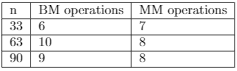

Из таблицы можно увидеть, что если $n=2^k-1, k \in N$, то намного выгоднее использовать метод множителей, если $n=2^k+1, k \in N$, то выгодно использовать бинарный метод, в остальных случаях метод множителей показывает себя немного лучше.

### Реализовать алгоритм Яо для вычисления приближённых аддитивных цепочек для различных чисел при варьировании параметра $k$
Был реализован алгоритм Яо на языке программирования python, код представлен ниже:

In [1]:
from math import log


def binary_algorithm(x, n):
    operations = bin(n)[3:]
    chain = [x]
    cur_pow = x
    for operation in operations:
        cur_pow *= 2
        chain.append(cur_pow)
        if operation == '1':
            cur_pow += x
            chain.append(cur_pow)
    return chain


def Yao_algorithm(n, k):
    add_chain = [2 ** i for i in range(int(log(n, 2)) + 1)]
    muls = []
    divider = 2**k
    index = 0
    while divider**index < n:
        index += 1
    index -= 1
    end_state = n
    while n > 0:
        cur_mul = n // divider**index
        n -= cur_mul*divider**index
        muls.append((cur_mul, divider**index))
        index -= 1
    muls.reverse()
    d_count = []
    while muls:
        z = min(muls, key=lambda x: x[0])[0]
        d_z = 0
        for i in muls:
            if i[0] == z:
                d_z += i[1]
                if d_z not in add_chain:
                    add_chain.append(d_z)
        d_count.append((d_z, z))
        muls = list(filter(lambda x: x[0] != z, muls))
    for i in d_count:
        tmp_chain = binary_algorithm(i[0], i[1])
        for j in tmp_chain:
            if j not in add_chain:
                add_chain.append(j)
    if end_state not in add_chain:
        add_chain.append(end_state)
    print("Аддитивная цепочка: ", add_chain)
    print("Длина аддитивной цепочки: ", len(add_chain))


if __name__ == "__main__":
    n = int(input("Введите N: "))
    k = int(input("Введите K: "))
    Yao_algorithm(n, k)


Введите N: 6574
Введите K: 3
Аддитивная цепочка:  [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 65, 40, 130, 195, 390, 6574]
Длина аддитивной цепочки:  19


Для тестирования были выбраны $n=1920,7436,3428,920$

Таблица результатов при разных $k$ для $n=1920$:

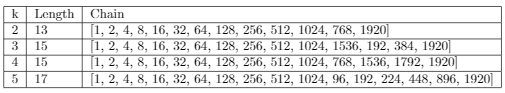

Таблица результатов при разных $k$ для $n=7436$:

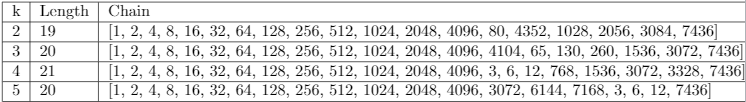

Таблица результатов при разных $k$ для $n=3428$:

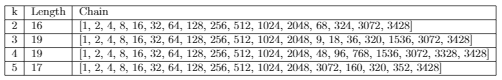

Таблица результатов при разных $k$ для $n=920$:

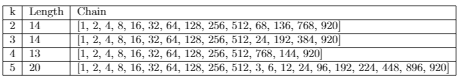

#### Вывод
Как можно наблюдать из таблиц, изменение k не существенно влияет на длинну приблизительной цепочки, но если его продолжать увеличивать, то её длинна будет становиться больше.

### Реализовать алгоритм дробления вектора индексов для нахождения минимальной звёздной цепочки для заданного числа. Протестировать алгоритм при  $𝑛>500$ .
Был реализован алгоритм дробления вектора индексов, код представлен ниже:

In [2]:
import math
import time


def construct_chain_from_index(r_i):
    add_chain = [1]
    for i in r_i:
        add_chain.append(add_chain[i-1]+add_chain[-1])
    return add_chain


def decrease_chain(chain, q, is_const_chain):
    chain.reverse()
    i = 0
    while chain[i] == 1:
        i+=1
        if i >= len(chain):
            chain.append(0)
            return chain
    chain[i] -= 1
    j = 0
    while j < i:
        chain[j] = len(chain) - j
        if not is_const_chain:
            chain[j] += q
        j += 1
    chain.reverse()
    return chain


def Vector_index(n):
    low_op = math.ceil(math.log(n, 2))
    high_op = len(bin(n)[3:]) + bin(n)[3:].count('1')
    m = low_op
    while m <= high_op:
        q = int(m/2)
        const_chain = [i+1 for i in range(q)]
        while len(const_chain) == q:
            rho_chain = [i+1+q for i in range(m-q)]
            add_chain = construct_chain_from_index(const_chain + rho_chain)
            if add_chain[-1] == n:
                return add_chain
            a_max = add_chain[q] * 2**(m - q)
            a_min = add_chain[q] + m - q
            if n < a_min or n > a_max:
                const_chain = decrease_chain(const_chain, q, True)
                continue
            while len(rho_chain) == m - q:
                add_chain = construct_chain_from_index(const_chain + rho_chain)
                if add_chain[-1] == n:
                    return add_chain
                rho_chain = decrease_chain(rho_chain, q, False)
            const_chain = decrease_chain(const_chain, q, True)
        m += 1
    return ("Didn't got any chain")


if __name__ == "__main__":
    n = int(input("Введите n: "))
    start = time.time()
    add_chain = Vector_index(n)
    end = time.time()
    print(f"Время выполнения: {round(end - start, 5)} секунд")
    if type(add_chain) == 'str':
        print(add_chain)
        exit(0)
    print("Аддитивная цепочка: ", add_chain)
    print("Длинна цепочки: ", len(add_chain))


Введите n: 257
Время выполнения: 0.001 секунд
Аддитивная цепочка:  [1, 2, 4, 8, 16, 32, 64, 128, 256, 257]
Длинна цепочки:  10


Далее представлены результаты тестирования для $n>500$:

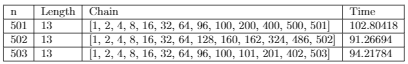

Сравнение с другими алгоритмами:

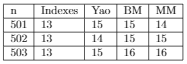

#### Вывод
Как мы можем заметить, алгоритм дробления индексов показывает наилучшую длину аддитивной цепочки, но выполняется он невероятно медленно. Бинарный метод выполняется очень быстро, как и алгоритм Яо, но проигрывает второму по длинне цепочки. Метод множителей выполняется немного медленнее, чем алгоритм Яо, или бинарный метод, но иногда даёт меньшую длину цепочки, чем бинарный метод. Из этого можно заключить, что если вам нужно составить наименьшую аддитивную цепочку, не учитывая время, можно использовать алгоритм дробления индексов, а для быстрых вычислений лучше всего подойдёт алгоритм Яо, для $n>500$

### Проверить следствие 1 теоремы Брауэра для  $𝑛=1..200$  путём построения функции  $𝑙(𝑛)$  и аппроксимирующей кривой, полученной с помощью метода наименьших квадратов.
Был реализован код для визуализации данных на графике, а также аппроксимирующей кривой, результаты и код представлены ниже:

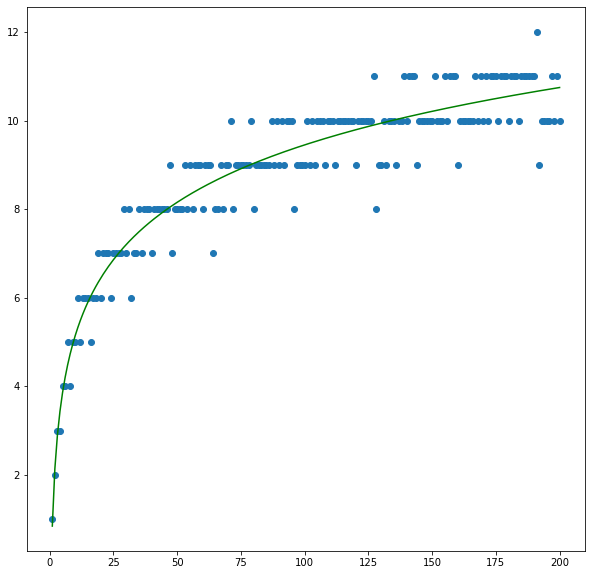

In [4]:
import matplotlib.pyplot as plot


if __name__ == "__main__":
    count = 201
    n = [i for i in range(1, count)]
    length = [len(Vector_index(i)) for i in range(1, count)]

    plot.figure(figsize=(10, 10))
    plot.scatter(n, length)

    m = matrix([[sum([float((log(i) ** 2)) for i in n]), sum([float(log(i)) for i in n])],
                [sum([float(log(i)) for i in n]), len(n)]])
    vec = vector([sum([float(length[i] * log(n[i])) for i in range(len(n))]), sum(length)])
    a = m.solve_right(vec)

    plot.plot(n, [log(i)*a[0] + a[1] for i in n], color='g')
    plot.show()



#### Вывод
Из графика можно увидеть, что при $1 \leq n \leq 200$ аппроксимирующая кривая напоминает функцию логарифма, которая эквивалентна функции $\lambda(n)$,  что подтверждает теорему Брауэра.

### Проверить гипотезу Шольца–Брауэра для  $1<n \leq 10$  на алгоритме дробления вектора индексов.

In [7]:
for n in range(2,11):
    print(f"n={n}: l*(2^n-1)={len(Vector_index(2**n-1))} ⩾ {len(Vector_index(n)) + n - 1} = l*(n) + n - 1")

n=2: l*(2^n-1)=3 ⩾ 3 = l*(n) + n - 1
n=3: l*(2^n-1)=5 ⩾ 5 = l*(n) + n - 1
n=4: l*(2^n-1)=6 ⩾ 6 = l*(n) + n - 1
n=5: l*(2^n-1)=8 ⩾ 8 = l*(n) + n - 1
n=6: l*(2^n-1)=9 ⩾ 9 = l*(n) + n - 1
n=7: l*(2^n-1)=11 ⩾ 11 = l*(n) + n - 1
n=8: l*(2^n-1)=11 ⩾ 11 = l*(n) + n - 1
n=9: l*(2^n-1)=13 ⩾ 13 = l*(n) + n - 1
n=10: l*(2^n-1)=14 ⩾ 14 = l*(n) + n - 1


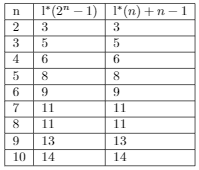

#### Вывод
Как можно увидеть, для $1<n \leq 10$, гипотеза Шольца-Брауэра, для каждой n из этого диапазона, $l^*(2^n-1) \geq l^*(n)+n-1$, что доказывает гипотезу для $1<n \leq 10$. Поскольку вычислять длину аддитивной цепочки для $n=2^k-1$ - крайне затратная задача, особенно для $n \geq 10$ (на вычисления уходит больше часа), нахождение длины с помощью формулы $l^*(k)+k-1$ происходит намного быстрее.

## Вывод по практической работе №1
Была проделана работа по изучению работы с построением аддитивных цепочек, нахождения $x^n$ для $n \in N$, а также вычислению минимальной длинны этих аддитивных цепочек. Были изучены бинарный метод и метод множителей, которые являются простейшими, но быстрыми алгоритмами вычисления аддитивной цепочки. Был изучен и реализован алгоритм Яо, который позволяет очень быстро рассчитать приблизительную аддитивную цепочку, а также алгоритм дробления вектора индексов, который позволяет найти как можно меньшую аддитивную цепочку, путём перебора звёздных цепочек, что позволяет найти малую по длине цепь за большое количество времени (ведь алгоритм имеет сложность $\frac{m!}{q!}$). Также было доказано 1-ое следствие теоремы Брауэра для $n \in \{1,..,200\}$ и гипотеза Шольца-Брауэра для $1 < n \leq 10$. Также были сделаны промежуточные выводы для каждого из этих пунктов.